In [1]:
import swagger_client
from swagger_client.rest import ApiException
from pprint import pprint
import requests

# Configure and create an API client
# using an API token
API_TOKEN = "000b74d58339656029f052a32d6f9e11fae8321f"
MLP_URL = "https://ml4dqm-playground.web.cern.ch"

# DEVELOP_API_TOKEN= "871450223ff7d809acdf6ffe8d11ef4a18a724c6"
DEVELOP_API_TOKEN = "5ebc661c6358fb9b1ad4cb064f98d86a1910240e"
MLP_DEVELOP_URL = "https://ml4dqm-playground-develop.web.cern.ch"

configuration = swagger_client.Configuration()
configuration.host = MLP_DEVELOP_URL
client = swagger_client.ApiClient(configuration)
client.set_default_header(header_name="Content-Type", header_value="application/json")
client.set_default_header(header_name="Authorization", header_value=f"Token {DEVELOP_API_TOKEN}")

api_instance = swagger_client.ApiApi(client)

import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import pandas as pd

In [3]:
[i.run_number for i in api_instance.list_runs().results]

[297047,
 297050,
 297056,
 297057,
 297113,
 297114,
 297169,
 297170,
 297175,
 297176,
 297177,
 297178,
 297282,
 297283,
 297424,
 297425,
 297426,
 297429,
 297432,
 297435,
 297467,
 297485,
 297486,
 297605,
 299062,
 299067,
 299149,
 299178,
 299180,
 299183,
 299184,
 299185,
 299318,
 299327,
 315267,
 315512,
 316059,
 316060,
 316153,
 316218,
 316944,
 316995,
 352417,
 352422,
 352425,
 352493,
 352499,
 352503,
 352505,
 352508]

In [6]:
# Get by run number
run_num = 297177
lh1d = api_instance.list_lumisection_histogram1_ds(
    lumisection__run__run_number=run_num
) 
print(f"Got {len(lh1d.results)} results!\n")
print(lh1d)



Got 50 results!

{'count': None,
 'next': '/api/lumisection_histograms_1d/?lumisection__run__run_number=297177&page=2',
 'previous': None,
 'results': [{'data': [0.0,
                       6180.0,
                       34196.0,
                       53652.0,
                       7706.0,
                       1846.0,
                       1012.0,
                       564.0,
                       393.0,
                       187.0,
                       118.0,
                       59.0,
                       38.0,
                       28.0,
                       17.0,
                       12.0,
                       12.0,
                       9.0,
                       6.0,
                       4.0,
                       6.0,
                       1.0,
                       1.0,
                       0.0,
                       1.0,
                       2.0,
                       2.0,
                       2.0,
                       0.0,
               

In [14]:
lh1d_df = pd.DataFrame.from_dict([result.to_dict() for result in lh1d.results])

lh1d_df.head()

,id,run,lumisection,title,entries,data,x_min,x_max,x_bin,source_data_file
0,8238,297177,143,size_PXDisk_+1,106083,"[0.0, 6180.0, 34196.0, 53652.0, 7706.0, 1846.0...",0.0,30.0,30,5536
1,8239,297177,143,size_PXDisk_+2,85567,"[0.0, 6810.0, 30495.0, 40814.0, 4555.0, 1130.0...",0.0,30.0,30,5536
2,8240,297177,143,size_PXDisk_+3,74646,"[0.0, 6668.0, 28357.0, 33163.0, 3975.0, 918.0,...",0.0,30.0,30,5536
3,8241,297177,143,size_PXDisk_-1,111315,"[0.0, 7395.0, 37490.0, 54211.0, 7749.0, 1863.0...",0.0,30.0,30,5536
4,8242,297177,143,size_PXDisk_-2,101121,"[0.0, 9189.0, 37621.0, 46029.0, 5077.0, 1248.0...",0.0,30.0,30,5536


In [17]:
plot_hist = lambda x: plt.step(range(x.x_bin), x.data);

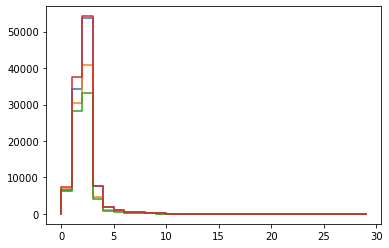

In [22]:
for i in range(4):
    plot_hist(lh1d_df.loc[i]);

In [6]:
ar = ak.Array([result.to_dict() for result in lh1d.results])

In [7]:
ar.fields

['id',
 'run',
 'lumisection',
 'title',
 'entries',
 'data',
 'x_min',
 'x_max',
 'x_bin',
 'source_data_file']

In [30]:
ar

<Array [{id: 8238, ... source_data_file: 5536}] type='50 * {"id": int64, "run": ...'>

In [31]:
for i in ar.data:
    print(i)

[0, 6.18e+03, 3.42e+04, 5.37e+04, 7.71e+03, 1.85e+03, 1.01e+03, ... 1, 2, 2, 2, 0, 1]
[0, 6.81e+03, 3.05e+04, 4.08e+04, 4.56e+03, 1.13e+03, 705, ... 3, 1, 1, 0, 3, 3, 0]
[0, 6.67e+03, 2.84e+04, 3.32e+04, 3.98e+03, 918, 575, 332, ... 5, 2, 2, 3, 0, 0, 4]
[0, 7.4e+03, 3.75e+04, 5.42e+04, 7.75e+03, 1.86e+03, 1.01e+03, ... 2, 0, 0, 1, 0, 2]
[0, 9.19e+03, 3.76e+04, 4.6e+04, 5.08e+03, 1.25e+03, 823, ... 2, 3, 1, 2, 3, 4, 0]
[0, 8.08e+03, 3.11e+04, 3.25e+04, 4.01e+03, 977, 623, 367, ... 2, 3, 3, 3, 0, 2, 1]
[421, 0, 0, 0, 0, 0, 1, 1, 0, 5, 5, 11, 25, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6.39e+05, 7.33e+04, 5.28e+04, 1.47e+05, ... 2.54e+05, 2.56e+05, 2.48e+05, 1.73e+06]
[1.54e+04, 1.05e+05, 1.94e+05, 5.38e+05, ... 5.77e+04, 5.82e+04, 4.42e+04, 7.43e+05]
[1.08e+04, 7.45e+04, 1.68e+05, 5.29e+05, ... 4.84e+04, 5.14e+04, 3.56e+04, 6.96e+05]
[7.99e+03, 9.3e+04, 1.96e+05, 5.09e+05, ... 3.98e+04, 4.33e+04, 2.94e+04, 5.61e+05]
[2.68e+03, 8.7e+03, 2.18e+04, 9.55e+04, ... 2.41e+04, 2.54e+04, 1.62e+0

In [35]:
ar.title.tolist()

['size_PXDisk_+1',
 'size_PXDisk_+2',
 'size_PXDisk_+3',
 'size_PXDisk_-1',
 'size_PXDisk_-2',
 'size_PXDisk_-3',
 'goodvtxNbr',
 'adc_PXLayer_1',
 'adc_PXLayer_2',
 'adc_PXLayer_3',
 'adc_PXLayer_4',
 'adc_PXDisk_+1',
 'adc_PXDisk_+2',
 'adc_PXDisk_+3',
 'adc_PXDisk_-1',
 'adc_PXDisk_-2',
 'adc_PXDisk_-3',
 'num_clusters_ontrack_PXBarrel',
 'num_clusters_ontrack_PXForward',
 'chargeInner_PXLayer_1',
 'chargeInner_PXLayer_2',
 'chargeInner_PXLayer_3',
 'chargeInner_PXLayer_4',
 'chargeOuter_PXLayer_1',
 'chargeOuter_PXLayer_2',
 'chargeOuter_PXLayer_3',
 'chargeOuter_PXLayer_4',
 'size_PXLayer_1',
 'size_PXLayer_2',
 'size_PXLayer_3',
 'size_PXLayer_4',
 'charge_PXDisk_+1',
 'charge_PXDisk_+2',
 'charge_PXDisk_+3',
 'charge_PXDisk_-1',
 'charge_PXDisk_-2',
 'charge_PXDisk_-3',
 'MainDiagonal Position',
 'NumberOfClustersInPixel',
 'NumberOfClustersInStrip',
 'NormalizedHitResiduals_TEC__wheel__1',
 'Summary_ClusterStoNCorr__OnTrack__TEC__MINUS__wheel__1',
 'NormalizedHitResiduals_TEC__

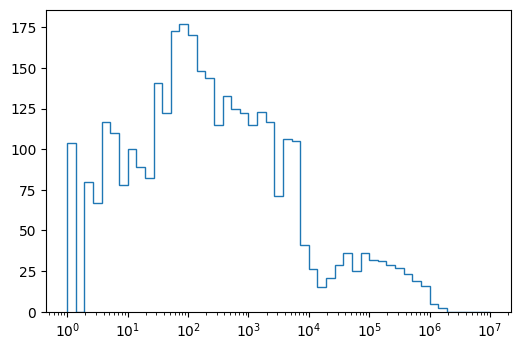

In [36]:
logbins=np.logspace(0,7)

plt.figure(dpi=100)
plt.hist(ak.ravel(ar.data),
        bins=logbins,log=False,
        histtype='step');
plt.xscale('log')

No handles with labels found to put in legend.


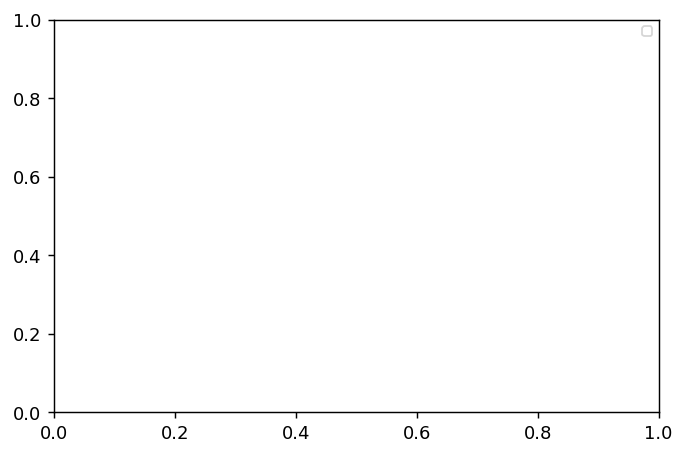

In [37]:
plt.figure(dpi=130)
for i,nbins,minval,maxval,title in zip(ar.data,ar.x_bin,ar.x_min,ar.x_max,ar.title):
    if 'tib' in title.lower() :
        plt.plot(np.linspace(minval,maxval,nbins),i,lw=1,label=title) 
plt.legend(fontsize=7)
# plt.yscale('log')
plt.show()

# Managing DQM Histogram Data Files

DQM data files are `.csv` files (`.root` support for nanoDQM files will be added in the future) which contain:
- Run Histograms or
- Lumisection 1D Histograms or
- Lumisection 2D Histograms

They are represented in DQM Playground's database with the `HistogramDataFile` model. 

By default, these files are expected to reside in `/eos/project/c/cmsml4dc`. This directory is not being monitored for changes, and new files can only be discovered using a [custom Django Management command](https://cmstrackerdpg.github.io/cms-tkdpg-software-knowledge-transfer/mlplayground/apps/histogram_file_manager/management/). 

The contents of a Histogram Data Files are unknown, until a user starts parsing the file by specifying three options:
- The `granularity` of the data (`run` or `lumisection`),
- The `data_dimensionality` of the data (`1` for 1D or `2` for 2D) and
- The file `file_format` (`csv` only available currently).

Depending on the combination of the three options above, DQM Playground will try to extract the appropriate histograms from the Histogram Data File, namely:

- `granularity=run`, `data_dimensionality=1` and `file_format=csv` will produce `RunHistogram`s,
- `granularity=lum`, `data_dimensionality=1` and `file_format=csv` will produce `LumisectionHistogram1D`s,
- `granularity=lum`, `data_dimensionality=2` and `file_format=csv` will produce `LumisectionHistogram2D`s.

## Listing all the available Histogram Data Files

To list all the Histogram Data Files that DQM Playground has discovered:

In [62]:
available_hdf = api_instance.list_histogram_data_files(page=1) # No filters supplied
print(f"Got {len(available_hdf.results)} Histogram Data Files")  # Keep in mind that results are returned in pages of 50

Got 50 Histogram Data Files


In [64]:
available_hdf.results

[{'contents': [],
  'created': datetime.datetime(2023, 9, 14, 10, 25, 32, 636106, tzinfo=tzutc()),
  'data_era': '',
  'entries_processed': 0,
  'entries_total': 0,
  'filepath': '/eos/project/c/cmsml4dc/ML_2020/PerRun_UL2017_Data/JetHT_297047_UL2017.csv',
  'filesize': 10.705409049987793,
  'id': 1,
  'lumisection_histograms_1d': 0,
  'lumisection_histograms_2d': 0,
  'modified': datetime.datetime(2023, 9, 14, 10, 25, 32, 636132, tzinfo=tzutc()),
  'percentage_processed': '0',
  'run_histograms': 0},
 {'contents': [],
  'created': datetime.datetime(2023, 9, 14, 10, 25, 32, 667922, tzinfo=tzutc()),
  'data_era': '',
  'entries_processed': 0,
  'entries_total': 0,
  'filepath': '/eos/project/c/cmsml4dc/ML_2020/PerRun_UL2017_Data/JetHT_297050_UL2017.csv',
  'filesize': 11.093338966369629,
  'id': 2,
  'lumisection_histograms_1d': 0,
  'lumisection_histograms_2d': 0,
  'modified': datetime.datetime(2023, 9, 14, 10, 25, 32, 667940, tzinfo=tzutc()),
  'percentage_processed': '0',
  'run_his

## Filtering histogram data files by filename
For this example, we will try to get the status of the `ZeroBias_2017B_DataFrame_2D_17.csv` DQM file.

In [119]:
available_hdf = api_instance.list_histogram_data_files(filepath__contains="ZeroBias_2017B_DataFrame_2D_17")
print(available_hdf.results)

[{'contents': [],
 'created': datetime.datetime(2023, 9, 14, 10, 25, 54, 172732, tzinfo=tzutc()),
 'data_era': '',
 'entries_processed': 0,
 'entries_total': 0,
 'filepath': '/eos/project/c/cmsml4dc/ML_2020/UL2017_Data/DF2017B_2D_Complete/ZeroBias_2017B_DataFrame_2D_17.csv',
 'filesize': 2256.8446884155273,
 'id': 5577,
 'lumisection_histograms_1d': 0,
 'lumisection_histograms_2d': 0,
 'modified': datetime.datetime(2023, 9, 14, 10, 25, 54, 172759, tzinfo=tzutc()),
 'percentage_processed': '0',
 'run_histograms': 0}]


If parsing has already been started for this specific Histogram Data File, we will see the `data_dimensionality` and `granularity` values already set. If not, they will be unknown. 

Once parsing of the file has started, the total number of `run_histograms`, `lumisection_histograms_1d` or `lumisection_histograms_2d` that were extracted from this file will be available under the respective values in the response. 

Its parsing percentage can also be seen under the `percentage_processed` value.

## Starting parsing a Histogram Data File
To start parsing a Histogram Data file, we need:
- Its unique `id`,
- The `granularity` of the data contained (`run` or `lumisection`),
- The `data_dimensionality` of the data (`1` for 1D or `2` for 2D) and
- The file `file_format` (`csv`).

In [110]:
available_hdf = api_instance.list_histogram_data_files(id="6822")
file_id = available_hdf.results[0].id

# TODO: Buggy generated code by swagger creates multiple definitions for start_parsing_histogram_data_file
# body = {'granularity':'lum', 'data_dimensionality':2, 'file_format':'csv'}
# success = api_instance.start_parsing_histogram_data_file(id=file_id, body=body)
print(file_id)
# Manually do the request for now
r = requests.post(
    f"{MLP_DEVELOP_URL}/api/histogram_data_files/{file_id}/start_parsing/",
    headers={"Content-Type": "application/json", "Authorization": f"Token {DEVELOP_API_TOKEN}"},
    json={'granularity':'lum', 'data_dimensionality':1, 'file_format':'root'}
)

6822


In [112]:
print(f"Parsing for file {file_id} started: {r.ok}")

Parsing for file 6822 started: True


In [39]:
import time
for i in range(4):
    print(i)
    
    available_hdf = api_instance.list_histogram_data_files(id="6822")
    print(available_hdf.results[0].percentage_processed)
    time.sleep(5)

There are 137 pages with $\approx$ 50 files each

In [41]:
histo_files = api_instance.list_histogram_data_files(granularity='lum').results

pd.DataFrame([i.to_dict() for i in histo_files])


,id,filepath,filesize,data_era,entries_total,entries_processed,percentage_processed,contents,created,modified,run_histograms,lumisection_histograms_1d,lumisection_histograms_2d
0,5536,/eos/project/c/cmsml4dc/ML_2020/UL2017_Data/DF...,53.571169,,100000,100000,100.0,"[{'granularity': 'lum', 'data_dimensionality':...",2023-09-14 10:25:54.048812+00:00,2023-09-15 17:22:16.609863+00:00,0,87076,0
1,6821,/eos/project/m/mlplayground/public/DQMIO/nanod...,20.935353,,28302,28302,100.0,"[{'granularity': 'lum', 'data_dimensionality':...",2023-09-14 10:25:59.226725+00:00,2023-10-03 15:13:14.070799+00:00,0,22962,5340
2,6821,/eos/project/m/mlplayground/public/DQMIO/nanod...,20.935353,,28302,28302,100.0,"[{'granularity': 'lum', 'data_dimensionality':...",2023-09-14 10:25:59.226725+00:00,2023-10-03 15:13:14.070799+00:00,0,22962,5340
3,6822,/eos/project/m/mlplayground/public/DQMIO/nanod...,136.508924,,188892,188457,99.76970967537005,"[{'granularity': 'lum', 'data_dimensionality':...",2023-09-14 10:25:59.229631+00:00,2023-10-03 18:51:20.445459+00:00,0,152817,35640
4,6822,/eos/project/m/mlplayground/public/DQMIO/nanod...,136.508924,,188892,188457,99.76970967537005,"[{'granularity': 'lum', 'data_dimensionality':...",2023-09-14 10:25:59.229631+00:00,2023-10-03 18:51:20.445459+00:00,0,152817,35640
5,6826,/eos/project/m/mlplayground/public/DQMIO/nanod...,3.716823,,1431,1431,100.0,"[{'granularity': 'lum', 'data_dimensionality':...",2023-09-14 10:25:59.242176+00:00,2023-09-28 16:00:14.443829+00:00,0,1161,270
6,6826,/eos/project/m/mlplayground/public/DQMIO/nanod...,3.716823,,1431,1431,100.0,"[{'granularity': 'lum', 'data_dimensionality':...",2023-09-14 10:25:59.242176+00:00,2023-09-28 16:00:14.443829+00:00,0,1161,270


In [72]:
res = api_instance.list_histogram_data_files(filepath__contains='/eos/project/m/mlplayground/public/DQMIO/nanodqmio_from_das/store_data_Run2022A_ZeroBias_DQMIO_19Jan2023-v2_2550000_B7C5D067-F538-42CE-9261-033D668E62D0.root').results
assert (len(res) ==1) & (type(res) == list)
res[0]

{'contents': [{'data_dimensionality': 1, 'granularity': 'lum'},
              {'data_dimensionality': 2, 'granularity': 'lum'}],
 'created': datetime.datetime(2023, 9, 14, 10, 25, 59, 226725, tzinfo=tzutc()),
 'data_era': '',
 'entries_processed': 28302,
 'entries_total': 28302,
 'filepath': '/eos/project/m/mlplayground/public/DQMIO/nanodqmio_from_das/store_data_Run2022A_ZeroBias_DQMIO_19Jan2023-v2_2550000_B7C5D067-F538-42CE-9261-033D668E62D0.root',
 'filesize': 20.93535327911377,
 'id': 6821,
 'lumisection_histograms_1d': 22962,
 'lumisection_histograms_2d': 5340,
 'modified': datetime.datetime(2023, 10, 3, 15, 13, 14, 70799, tzinfo=tzutc()),
 'percentage_processed': '100.0',
 'run_histograms': 0}

In [71]:
res

[{'contents': [{'data_dimensionality': 1, 'granularity': 'lum'},
               {'data_dimensionality': 2, 'granularity': 'lum'}],
  'created': datetime.datetime(2023, 9, 14, 10, 25, 59, 226725, tzinfo=tzutc()),
  'data_era': '',
  'entries_processed': 28302,
  'entries_total': 28302,
  'filepath': '/eos/project/m/mlplayground/public/DQMIO/nanodqmio_from_das/store_data_Run2022A_ZeroBias_DQMIO_19Jan2023-v2_2550000_B7C5D067-F538-42CE-9261-033D668E62D0.root',
  'filesize': 20.93535327911377,
  'id': 6821,
  'lumisection_histograms_1d': 22962,
  'lumisection_histograms_2d': 5340,
  'modified': datetime.datetime(2023, 10, 3, 15, 13, 14, 70799, tzinfo=tzutc()),
  'percentage_processed': '100.0',
  'run_histograms': 0}]

## Discovering new DQMIO files [Admins only]
If new files are added in the directories that DQMIO files reside, they won't be automatically discovered by DQM Playground without forcing a new discovery process. To do so:

In [124]:
# Manually do the request for now
r = requests.get(
    f"{MLP_DEVELOP_URL}/api/histogram_data_files/discover/",
    headers={"Content-Type": "application/json", "Authorization": f"Token {DEVELOP_API_TOKEN}"},
)

print(f"Discovery started: {r.ok}")

r.content

Discovery started: True


b''